In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'lines.markersize': 20,
          'lines.linewidth': 3
         }

pylab.rcParams.update(params)

In [4]:
X_SCALE = 100 

경사하강법: 오차를 줄이는 방향으로 발전시킴

In [5]:
# 2차 실험

def get_y(x):
    xn = x/X_SCALE #추가
    return np.cos(xn) + (np.sin(xn*10)*0.3)

def get_direction(error, px, cx):
    x_dir = (((cx-px)>0)-0.5) * 2
    error_dir = -((error>0)-0.5) * 2
    gradient_dir = x_dir * error_dir
    return gradient_dir * X_SCALE

def get_error(cy, py):
    return cy-py

def set_title(epoch, direction, error, lr):
    title_str = 'epoch: %d\nDirection: %.2f, dError: %.2f, lr: %.2f'% (epoch, direction, error, lr)
    plt.title(title_str)

In [6]:
N = 100
x = np.linspace(0, np.pi*2, N)* X_SCALE
y = get_y(x)
p = np.random.randint(0, x.shape[0]-1)
cx = x[p]
cy = y[p]
global global_n
global_n = 0


In [7]:
print(x)
print(y)
print(p)
print(cx, cy)

[  0.           6.34665183  12.69330365  19.03995548  25.3866073
  31.73325913  38.07991095  44.42656278  50.7732146   57.11986643
  63.46651825  69.81317008  76.15982191  82.50647373  88.85312556
  95.19977738 101.54642921 107.89308103 114.23973286 120.58638468
 126.93303651 133.27968833 139.62634016 145.97299198 152.31964381
 158.66629564 165.01294746 171.35959929 177.70625111 184.05290294
 190.39955476 196.74620659 203.09285841 209.43951024 215.78616206
 222.13281389 228.47946572 234.82611754 241.17276937 247.51942119
 253.86607302 260.21272484 266.55937667 272.90602849 279.25268032
 285.59933214 291.94598397 298.2926358  304.63928762 310.98593945
 317.33259127 323.6792431  330.02589492 336.37254675 342.71919857
 349.0658504  355.41250222 361.75915405 368.10580588 374.4524577
 380.79910953 387.14576135 393.49241318 399.839065   406.18571683
 412.53236865 418.87902048 425.2256723  431.57232413 437.91897595
 444.26562778 450.61227961 456.95893143 463.30558326 469.65223508
 475.9988869

In [8]:
# 2차 실험
learning_rate = 0.1

current_direction = (np.random.rand() - 0.5) * 100
nx = cx + current_direction
ny = get_y(nx)

<Figure size 800x500 with 0 Axes>

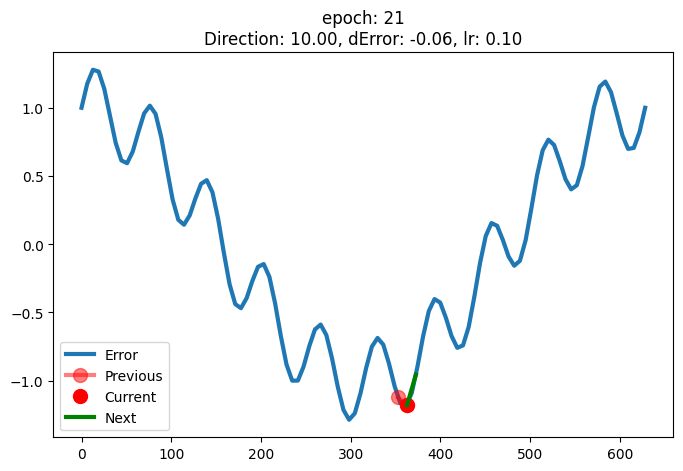

error: [-0.44908474952062005, 0.24795504847111205, -0.24795504847111205, -0.05742190471253861, 0.22428387637816494, -0.22428387637816494, 0.05742190471253861, -0.05742190471253861, 0.22428387637816494, -0.22428387637816494, 0.05742190471253861, -0.05742190471253861, 0.22428387637816494, -0.22428387637816494, 0.05742190471253861, -0.05742190471253861, 0.22428387637816494, -0.22428387637816494, 0.05742190471253861, -0.05742190471253861]


In [9]:
from IPython import display
error, lr = [], []
for i in range(20):
    px, py = cx, cy   # previous
    cx, cy = nx, ny   # current
    d_error = get_error(cy, py)
    error.append(d_error)
    current_direction = get_direction(d_error, px, cx)*learning_rate
    nx = cx + current_direction
    ny = get_y(nx)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.plot(x,y)
    plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)
    plt.plot(cx, cy, 'r.')
    plt.plot([cx, nx], [cy, ny], 'g-')
    plt.plot([cx, cx], [cy, cy])
    set_title((i+2), current_direction, d_error, learning_rate)
    plt.legend(['Error', 'Previous', 'Current', 'Next'])
    plt.show(block=False)
    plt.pause(0.5)
print('error:' , error)

In [10]:
learning_rate = 0.2

current_direction = (np.random.rand() - 0.5) * 100
nx = cx + current_direction
ny = get_y(nx)

<Figure size 800x500 with 0 Axes>

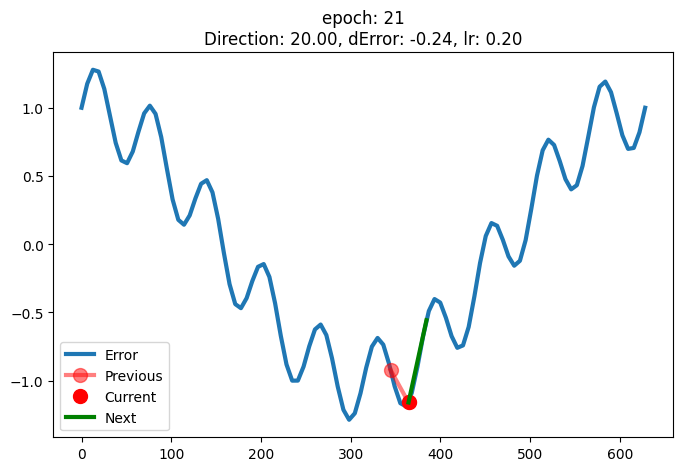

error: [0.6234267984189302, -0.6027584789539614, 0.23795793997667458, -0.23795793997667458, 0.6027584789539614, -0.6027584789539614, 0.23795793997667458, -0.23795793997667458, 0.6027584789539614, -0.6027584789539614, 0.23795793997667458, -0.23795793997667458, 0.6027584789539614, -0.6027584789539614, 0.23795793997667458, -0.23795793997667458, 0.6027584789539614, -0.6027584789539614, 0.23795793997667458, -0.23795793997667458]


In [11]:
from IPython import display
error, lr = [], []
for i in range(20):
    px, py = cx, cy   # previous
    cx, cy = nx, ny   # current
    d_error = get_error(cy, py)
    error.append(d_error)
    current_direction = get_direction(d_error, px, cx)*learning_rate
    nx = cx + current_direction
    ny = get_y(nx)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.plot(x,y)
    plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)
    plt.plot(cx, cy, 'r.')
    plt.plot([cx, nx], [cy, ny], 'g-')
    plt.plot([cx, cx], [cy, cy])
    set_title((i+2), current_direction, d_error, learning_rate)
    plt.legend(['Error', 'Previous', 'Current', 'Next'])
    plt.show(block=False)
    plt.pause(0.5)
print('error:' , error)

In [12]:
learning_rate = 0.5 

current_direction = (np.random.rand() - 0.5) * 100
nx = cx + current_direction
ny = get_y(nx)

<Figure size 800x500 with 0 Axes>

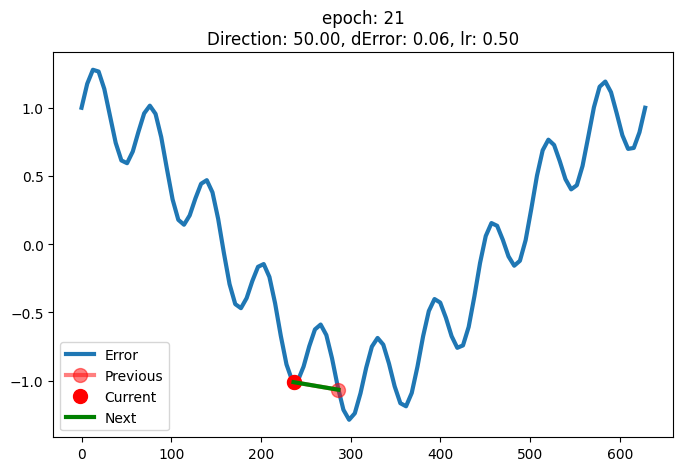

error: [0.6511377485539656, -0.22692660353902472, -0.33095781676513103, 0.055734765782305074, -0.055734765782305074, 0.33095781676513103, -0.33095781676513103, 0.055734765782305074, -0.055734765782305074, 0.33095781676513103, -0.33095781676513103, 0.055734765782305074, -0.055734765782305074, 0.33095781676513103, -0.33095781676513103, 0.055734765782305074, -0.055734765782305074, 0.33095781676513103, -0.33095781676513103, 0.055734765782305074]


In [13]:
from IPython import display
error, lr = [], []
for i in range(20):
    px, py = cx, cy   # previous
    cx, cy = nx, ny   # current
    d_error = get_error(cy, py)
    error.append(d_error)
    current_direction = get_direction(d_error, px, cx)*learning_rate
    nx = cx + current_direction
    ny = get_y(nx)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.plot(x,y)
    plt.plot([px, cx], [py, cy], 'r.-', alpha=0.5)
    plt.plot(cx, cy, 'r.')
    plt.plot([cx, nx], [cy, ny], 'g-')
    plt.plot([cx, cx], [cy, cy])
    set_title((i+2), current_direction, d_error, learning_rate)
    plt.legend(['Error', 'Previous', 'Current', 'Next'])
    plt.show(block=False)
    plt.pause(0.5)
print('error:' , error)